In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [3]:
df = pd.read_csv('Holiday_Package-1.csv')
df = df.iloc[:,1::]

In [4]:
df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


#### NULL VALUE CHECK AND DESCRIPTIVE ANALYSIS

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [6]:
pd.DataFrame(df.dtypes, columns = ['Data Types'])

,Data Types
Holliday_Package,object
Salary,int64
age,int64
educ,int64
no_young_children,int64
no_older_children,int64
foreign,object


In [7]:
pd.DataFrame(df.isnull().sum(), columns = ['Missing Values'])

,Missing Values
Holliday_Package,0
Salary,0
age,0
educ,0
no_young_children,0
no_older_children,0
foreign,0


In [8]:
print('Shape of data is:',df.shape[0],' x ',df.shape[1])

Shape of data is: 872  x  7


In [9]:
print('Duplicates in the data:', df.duplicated().sum())

Duplicates in the data: 0


#### Summary

In [10]:
df.describe()

,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000
mean,47729.172018,39.955275,9.307339,0.311927,0.982798
std,23418.668531,10.551675,3.036259,0.612870,1.086786
min,1322.000000,20.000000,1.000000,0.000000,0.000000
25%,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,53469.500000,48.000000,12.000000,0.000000,2.000000
max,236961.000000,62.000000,21.000000,3.000000,6.000000


#### Checking unique values

In [11]:
df['Holliday_Package'].value_counts()

no     471
yes    401
Name: Holliday_Package, dtype: int64

In [12]:
df['foreign'].value_counts()

no     656
yes    216
Name: foreign, dtype: int64

- The target variable here is no: as we wish to figure out the ones who have not taken the holiday package

In [13]:
df['no_older_children'].value_counts()

0    393
2    208
1    198
3     55
4     14
6      2
5      2
Name: no_older_children, dtype: int64

In [14]:
df['no_young_children'].value_counts()

0    665
1    147
2     55
3      5
Name: no_young_children, dtype: int64

- Young children: <7 yrs of age
- Older children: 7 and above

#### Univariate analysis

In [15]:
def univariate(col):
    print('Description of',col,' is: -')
    print(df[col].describe())
    print(' ')
    print('-----------------------------------------------------------')
    print("Mean is: ", df[col].mean())
    print("Median is: ", df[col].median())
    print("Mode is: ", df[col].mode()[0])
    print('-----------------------------------------------------------')
    print(" ")
    
    print("Distribution of ", col, ' is: -')
    
    sns.displot(x = df[col], kde = True, height = 3.5)
    plt.axvline(x = df[col].mean(), color = 'green',label = 'mean')
    plt.axvline(x = df[col].median(), color = 'red', label = 'median')
    plt.axvline(x = df[col].mode()[0], color = 'yellow', label = 'mode')
    plt.legend()
    plt.show()
    
    print('-----------------------------------------------------------')
    print(' ')
    print('Boxplot of',col,' is: -')
    plt.figure(figsize = (4,3))
    sns.boxplot(x = df[col],width = .6)
    plt.show()
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    print(' ')

Description of Salary  is: -
count       872.000000
mean      47729.172018
std       23418.668531
min        1322.000000
25%       35324.000000
50%       41903.500000
75%       53469.500000
max      236961.000000
Name: Salary, dtype: float64
 
-----------------------------------------------------------
Mean is:  47729.172018348625
Median is:  41903.5
Mode is:  32197
-----------------------------------------------------------
 
Distribution of  Salary  is: -


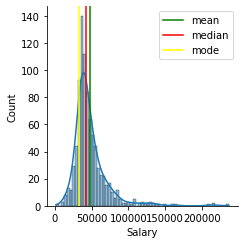

-----------------------------------------------------------
 
Boxplot of Salary  is: -


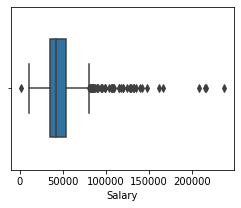

-----------------------------------------------------------
-----------------------------------------------------------
 
Description of age  is: -
count    872.000000
mean      39.955275
std       10.551675
min       20.000000
25%       32.000000
50%       39.000000
75%       48.000000
max       62.000000
Name: age, dtype: float64
 
-----------------------------------------------------------
Mean is:  39.955275229357795
Median is:  39.0
Mode is:  44
-----------------------------------------------------------
 
Distribution of  age  is: -


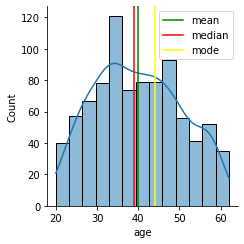

-----------------------------------------------------------
 
Boxplot of age  is: -


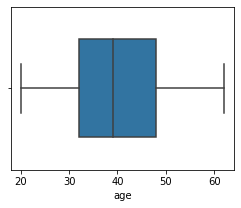

-----------------------------------------------------------
-----------------------------------------------------------
 
Description of educ  is: -
count    872.000000
mean       9.307339
std        3.036259
min        1.000000
25%        8.000000
50%        9.000000
75%       12.000000
max       21.000000
Name: educ, dtype: float64
 
-----------------------------------------------------------
Mean is:  9.307339449541285
Median is:  9.0
Mode is:  8
-----------------------------------------------------------
 
Distribution of  educ  is: -


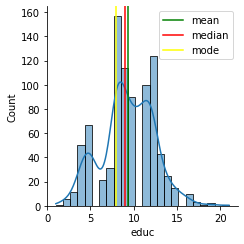

-----------------------------------------------------------
 
Boxplot of educ  is: -


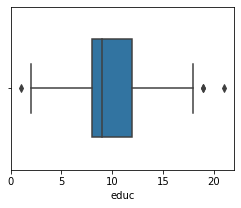

-----------------------------------------------------------
-----------------------------------------------------------
 
Description of no_young_children  is: -
count    872.000000
mean       0.311927
std        0.612870
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: no_young_children, dtype: float64
 
-----------------------------------------------------------
Mean is:  0.3119266055045872
Median is:  0.0
Mode is:  0
-----------------------------------------------------------
 
Distribution of  no_young_children  is: -


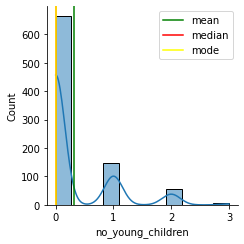

-----------------------------------------------------------
 
Boxplot of no_young_children  is: -


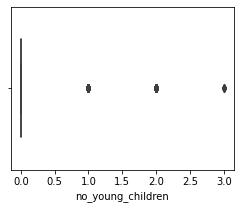

-----------------------------------------------------------
-----------------------------------------------------------
 
Description of no_older_children  is: -
count    872.000000
mean       0.982798
std        1.086786
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        6.000000
Name: no_older_children, dtype: float64
 
-----------------------------------------------------------
Mean is:  0.9827981651376146
Median is:  1.0
Mode is:  0
-----------------------------------------------------------
 
Distribution of  no_older_children  is: -


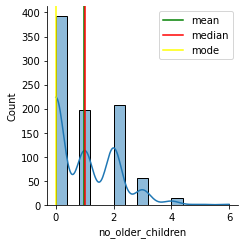

-----------------------------------------------------------
 
Boxplot of no_older_children  is: -


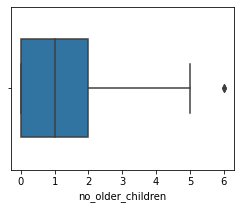

-----------------------------------------------------------
-----------------------------------------------------------
 


In [16]:
for i in df.columns:
    if(df[i].dtype != 'object'):
        univariate(i)
        

#### Bivariate

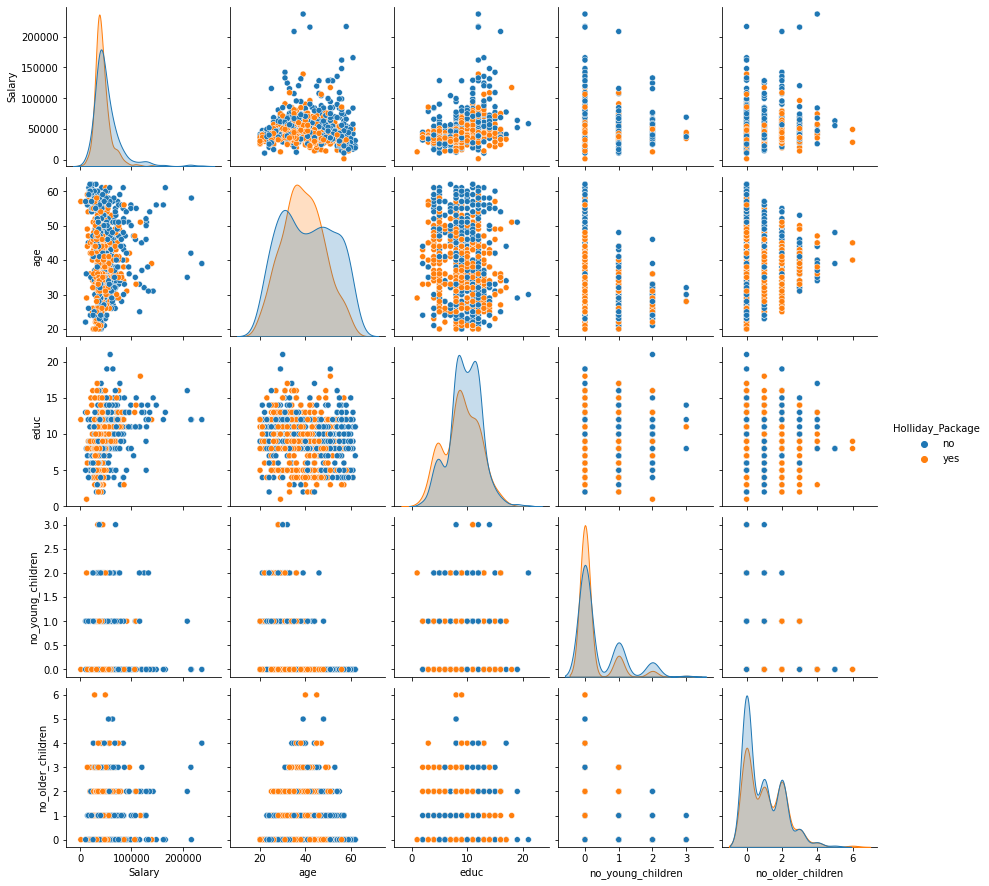

In [17]:
sns.pairplot(data = df, diag_kind = 'kde', hue = 'Holliday_Package')

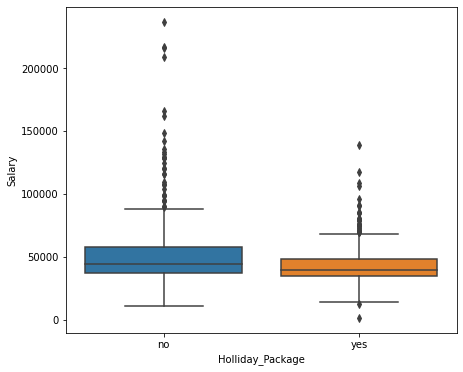

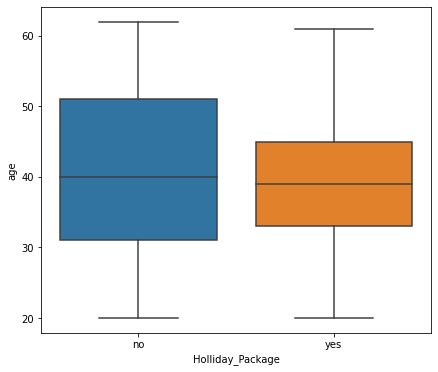

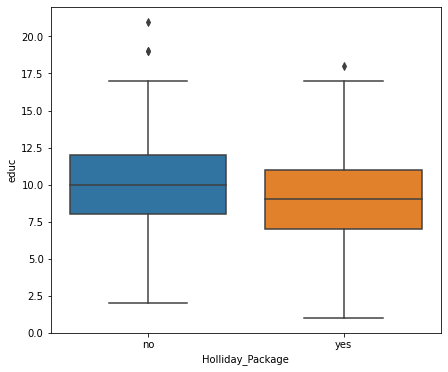

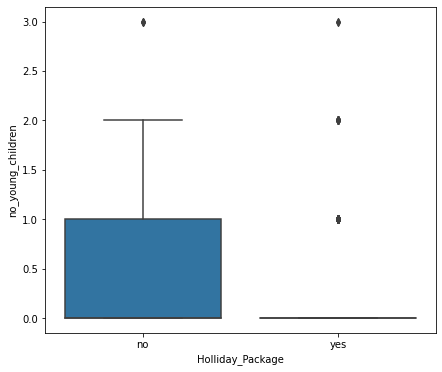

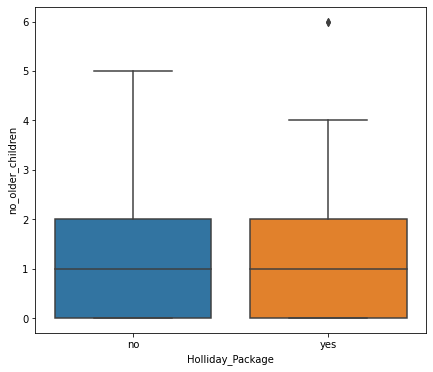

In [18]:
def boxplot(col):
    plt.figure(figsize = (7,6))
    sns.boxplot(y = df[col], x = df['Holliday_Package'])
    plt.show()

    
for i in df.columns:
    if(df[i].dtype!='object'):
        boxplot(i)

- No of children are discrete, they can be converted to categorical

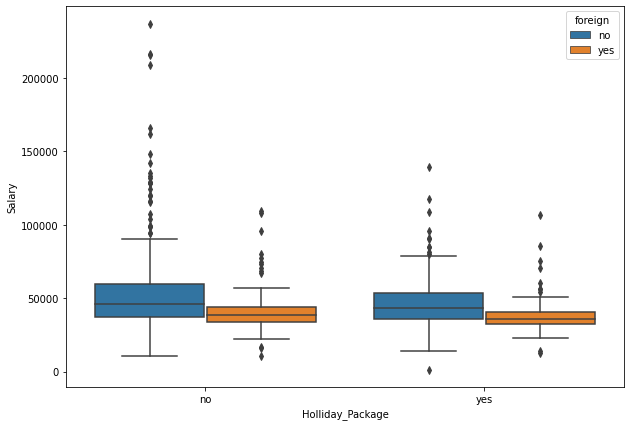

In [19]:
plt.figure(figsize = (10,7))
sns.boxplot(x = df.Holliday_Package, y = df.Salary, hue = df.foreign);

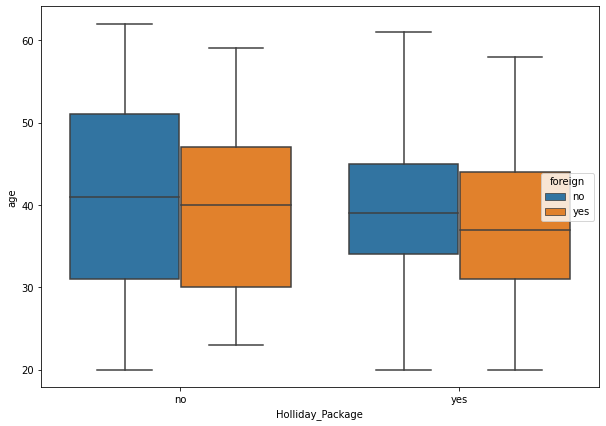

In [20]:
plt.figure(figsize = (10,7))
sns.boxplot(x = df.Holliday_Package, y = df.age, hue = df.foreign);

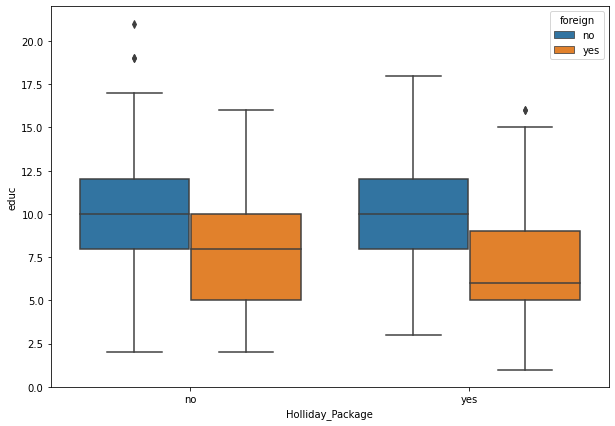

In [21]:
plt.figure(figsize = (10,7))
sns.boxplot(x = df.Holliday_Package, y = df.educ, hue = df.foreign);

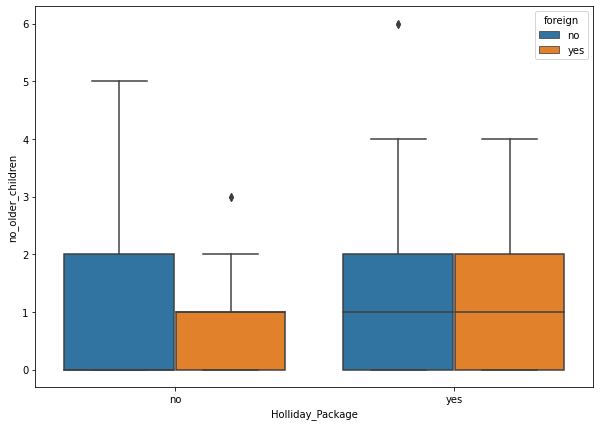

In [22]:
plt.figure(figsize = (10,7))
sns.boxplot(x = df.Holliday_Package, y = df.no_older_children, hue = df.foreign);

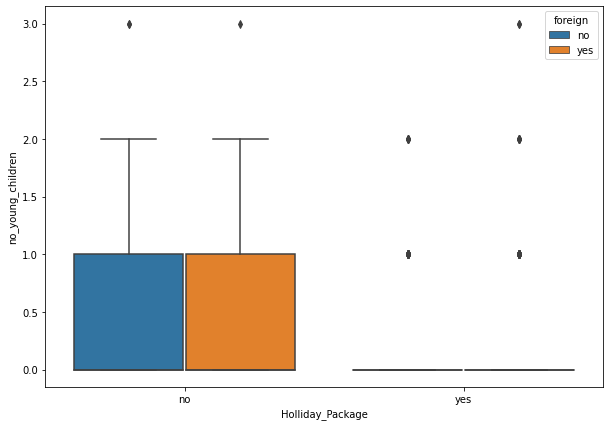

In [23]:
plt.figure(figsize = (10,7))
sns.boxplot(x = df.Holliday_Package, y = df.no_young_children, hue = df.foreign);

In [24]:
pd.crosstab(df.Holliday_Package, df.foreign)

foreign,no,yes
Holliday_Package,,
no,402,69
yes,254,147


In [25]:
df['no_older_children'] = pd.Categorical(df['no_older_children'])
df['no_young_children'] = pd.Categorical(df['no_young_children'])

# 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

In [26]:
df.Holliday_Package.value_counts(normalize = True)

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

<AxesSubplot:xlabel='Holliday_Package', ylabel='count'>

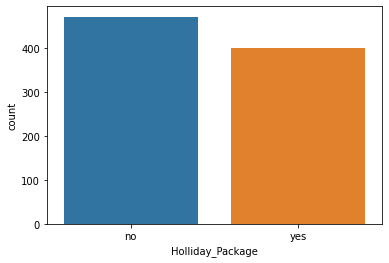

In [27]:
sns.countplot(x = df.Holliday_Package)

- We need to treat outliers in the salary column

In [28]:
df.select_dtypes(include = 'object').head()

,Holliday_Package,foreign
0,no,no
1,yes,no
2,no,no
3,no,no
4,no,no


In [29]:
df['Holliday_Package'] = df['Holliday_Package'].replace({'no':0,'yes':1})
df['foreign'] = df['foreign'].replace({'no':0,'yes':1})

In [30]:
pd.DataFrame(df.dtypes, columns = ['Data Type'])

,Data Type
Holliday_Package,int64
Salary,int64
age,int64
educ,int64
no_young_children,category
no_older_children,category
foreign,int64


In [31]:
df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,2,0,0
4,0,66734,44,12,0,2,0


#### Data Split

In [32]:
X = df.drop('Holliday_Package',axis = 1)
Y = df['Holliday_Package']

#### 70:30 Split

In [33]:
x_train, x_test, train_labels, test_labels = train_test_split(X,Y, test_size = .3, random_state = 1)

#### Logit model

In [34]:
logit = LogisticRegression()
logit.fit(x_train, train_labels)

LogisticRegression()

In [35]:
print('Accuracy on train data :',logit.score(x_train,train_labels))

Accuracy on train data : 0.519672131147541


In [36]:
print('Accuracy on test data:',logit.score(x_test,test_labels))

Accuracy on test data: 0.5305343511450382


- We need to implement grid search cv to imporve the model

In [37]:
grid={'penalty':['l1','elasticnet','l2','none'],
     'solver':['sag','lbfgs','saga','liblinear','newton-cg'],
     'tol':[0.1,.001,.0001,.000001],
     'dual':[True,False],
     'C':[.25,.5,.75,1],
     'fit_intercept':[True,False],
     'class_weight':['dict','balanced'],
     }

In [38]:
logit = LogisticRegression(max_iter=10000,n_jobs=2)

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
grid_search = GridSearchCV(estimator = logit, param_grid = grid, cv = 3, n_jobs=-1, scoring = 'f1')

In [41]:
grid_search.fit(x_train, train_labels)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'C': [0.25, 0.5, 0.75, 1],
                         'class_weight': ['dict', 'balanced'],
                         'dual': [True, False], 'fit_intercept': [True, False],
                         'penalty': ['l1', 'elasticnet', 'l2', 'none'],
                         'solver': ['sag', 'lbfgs', 'saga', 'liblinear',
                                    'newton-cg'],
                         'tol': [0.1, 0.001, 0.0001, 1e-06]},
             scoring='f1')

In [42]:
print(grid_search.best_params_)

{'C': 0.25, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.001}


In [43]:
print(grid_search.best_estimator_)

LogisticRegression(C=0.25, class_weight='balanced', max_iter=10000, n_jobs=2,
                   solver='newton-cg', tol=0.001)


In [44]:
best_model = grid_search.best_estimator_

In [45]:
best_model.score(x_train, train_labels)

0.680327868852459

In [46]:
best_model.score(x_test, test_labels)

0.6679389312977099

- We see a massive improvement in the model accuracy, after using the grid search cv

#### Classification report

In [47]:
print('Classification report for train data: -')
print(classification_report(train_labels, best_model.predict(x_train)))

Classification report for train data: -
              precision    recall  f1-score   support

           0       0.70      0.71      0.70       326
           1       0.66      0.64      0.65       284

    accuracy                           0.68       610
   macro avg       0.68      0.68      0.68       610
weighted avg       0.68      0.68      0.68       610



In [48]:
print('Classification report for test data: -')
print(classification_report(test_labels,best_model.predict(x_test)))

Classification report for test data: -
              precision    recall  f1-score   support

           0       0.71      0.67      0.69       145
           1       0.62      0.67      0.64       117

    accuracy                           0.67       262
   macro avg       0.67      0.67      0.67       262
weighted avg       0.67      0.67      0.67       262



#### Confusion Matrix

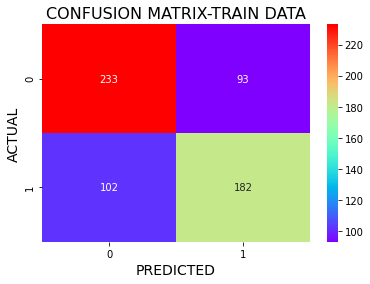

In [49]:
sns.heatmap(confusion_matrix(train_labels, best_model.predict(x_train)), annot = True, cmap = 'rainbow', fmt = 'd');
plt.title('CONFUSION MATRIX-TRAIN DATA',fontsize = 16)
plt.xlabel('PREDICTED',fontsize = 14);
plt.ylabel('ACTUAL',fontsize = 14);

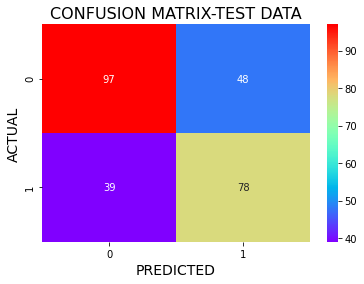

In [50]:
sns.heatmap(confusion_matrix(test_labels, best_model.predict(x_test)), annot = True, cmap = 'rainbow', fmt = 'd');
plt.title('CONFUSION MATRIX-TEST DATA',fontsize = 16)
plt.xlabel('PREDICTED',fontsize = 14);
plt.ylabel('ACTUAL',fontsize = 14);

#### ROC SCORE AND CURVE

In [51]:
fpr,tpr,threshold = roc_curve(train_labels, best_model.predict_proba(x_train)[:,1])

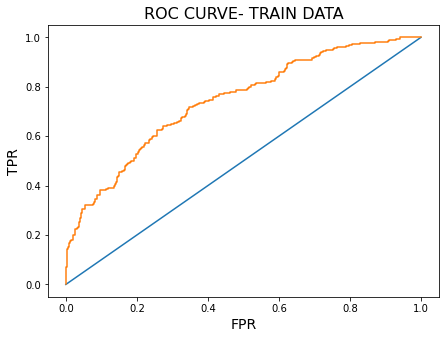

ROC AUC Score: 0.7416076211872462


In [52]:
plt.figure(figsize = (7,5))
plt.title('ROC CURVE- TRAIN DATA', fontsize = 16)
plt.xlabel('FPR',fontsize = 14)
plt.ylabel('TPR',fontsize = 14)
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.show()

print('ROC AUC Score:',roc_auc_score(train_labels,best_model.predict_proba(x_train)[:,1]))

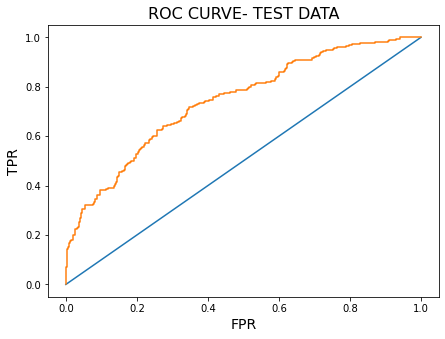

ROC AUC Score: 0.705334512231064


In [53]:
plt.figure(figsize = (7,5))
plt.title('ROC CURVE- TEST DATA', fontsize = 16)
plt.xlabel('FPR',fontsize = 14)
plt.ylabel('TPR',fontsize = 14)
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.show()

print('ROC AUC Score:',roc_auc_score(test_labels,best_model.predict_proba(x_test)[:,1]))

#### LDA

In [54]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, train_labels)

LinearDiscriminantAnalysis()

In [55]:
lda.score(x_train,train_labels)

0.6721311475409836

In [56]:
lda.score(x_test, test_labels)

0.6412213740458015

- Lets explore if grid search cv can yield better results

In [57]:
grid_lda = {'solver':['svd','lsqr','eigen'],
           'shrinkage':['auto','float',None],
           'store_covariance':[True,False],
           'tol':[.1,.01,.001,.0001,.00001],
           }

In [58]:
grid_search_lda = GridSearchCV(estimator = lda, param_grid = grid_lda, cv = 3)

In [59]:
grid_search_lda.fit(x_train, train_labels)

C:\Users\adity\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\adity\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\adity\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 463, in fit
    raise NotImplementedError('shrinkage not supported')
NotImplementedError: shrinkage not supported

  FitFailedWarning)
C:\Users\adity\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\adity\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531

C:\Users\adity\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\adity\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\adity\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 463, in fit
    raise NotImplementedError('shrinkage not supported')
NotImplementedError: shrinkage not supported

  FitFailedWarning)
C:\Users\adity\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\adity\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531

C:\Users\adity\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\adity\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\adity\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 466, in fit
    self._solve_lsqr(X, y, shrinkage=self.shrinkage)
  File "C:\Users\adity\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 291, in _solve_lsqr
    self.covariance_ = _class_cov(X, y, self.priors_, shrinkage)
  File "C:\Users\adity\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 127, in _class_cov
    cov += priors[idx] * np.atleast_2d(_cov(Xg, shrinkage))
  File "C:\Users\adity\anaconda3\lib\site-packages\sklearn\discriminant_anal

C:\Users\adity\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\adity\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\adity\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 468, in fit
    self._solve_eigen(X, y, shrinkage=self.shrinkage)
  File "C:\Users\adity\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 329, in _solve_eigen
    self.covariance_ = _class_cov(X, y, self.priors_, shrinkage)
  File "C:\Users\adity\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 127, in _class_cov
    cov += priors[idx] * np.atleast_2d(_cov(Xg, shrinkage))
  File "C:\Users\adity\anaconda3\lib\site-packages\sklearn\discriminant_an

GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(),
             param_grid={'shrinkage': ['auto', 'float', None],
                         'solver': ['svd', 'lsqr', 'eigen'],
                         'store_covariance': [True, False],
                         'tol': [0.1, 0.01, 0.001, 0.0001, 1e-05]})

In [60]:
grid_search_lda.best_params_

{'shrinkage': None, 'solver': 'svd', 'store_covariance': True, 'tol': 0.1}

In [61]:
grid_search_lda.best_estimator_

LinearDiscriminantAnalysis(store_covariance=True, tol=0.1)

In [62]:
best_model_lda = grid_search_lda.best_estimator_

In [63]:
best_model_lda.score(x_train, train_labels)

0.6721311475409836

In [64]:
best_model_lda.score(x_test, test_labels)

0.6412213740458015

- No increase in accuracy even after implmenting the grid search cv

#### Classification report

In [65]:
print('Classification report on train data: -\n')
print(classification_report(train_labels, best_model_lda.predict(x_train)))

Classification report on train data: -

              precision    recall  f1-score   support

           0       0.67      0.77      0.72       326
           1       0.68      0.56      0.61       284

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.67       610



In [66]:
print('Classification report on test data: -\n')
print(classification_report(test_labels, best_model_lda.predict(x_test)))

Classification report on test data: -

              precision    recall  f1-score   support

           0       0.66      0.71      0.69       145
           1       0.61      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262



#### Confusion Matrix

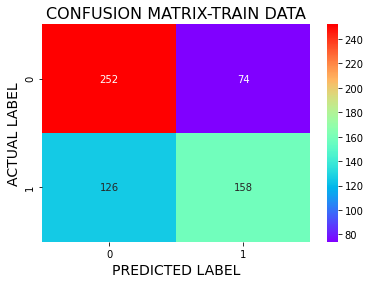

In [67]:
sns.heatmap(confusion_matrix(train_labels, best_model_lda.predict(x_train)), annot = True, cmap = 'rainbow', fmt = 'd');
plt.title('CONFUSION MATRIX-TRAIN DATA',fontsize = 16)
plt.xlabel('PREDICTED LABEL', fontsize = 14)
plt.ylabel('ACTUAL LABEL',fontsize = 14)
plt.show()

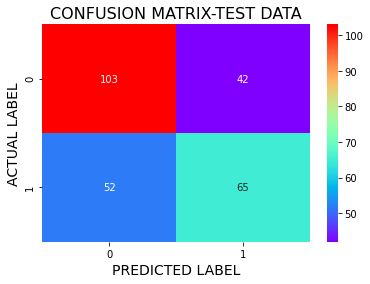

In [68]:
sns.heatmap(confusion_matrix(test_labels, best_model_lda.predict(x_test)), annot = True, cmap = 'rainbow', fmt = 'd');
plt.title('CONFUSION MATRIX-TEST DATA',fontsize = 16)
plt.xlabel('PREDICTED LABEL', fontsize = 14)
plt.ylabel('ACTUAL LABEL',fontsize = 14)
plt.show()

#### ROC AUC CURVE AND AUC SCORE

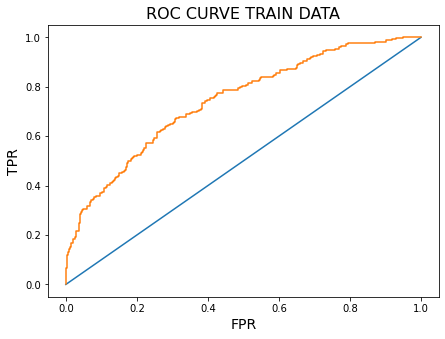

ROC AUC SCORE 0.7421152682968979


In [69]:
fpr,tpr,threshold = roc_curve(train_labels,best_model_lda.predict_proba(x_train)[:,1])
plt.figure(figsize = (7,5))
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR',fontsize = 14)
plt.ylabel('TPR',fontsize = 14)
plt.title('ROC CURVE TRAIN DATA',fontsize =16)
plt.show()
print('ROC AUC SCORE',roc_auc_score(train_labels, best_model_lda.predict_proba(x_train)[:,1]))

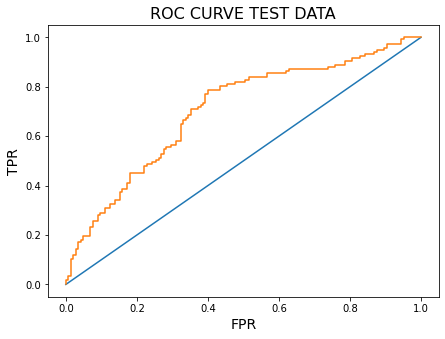

ROC AUC SCORE 0.7029177718832891


In [70]:
fpr,tpr,threshold = roc_curve(test_labels,best_model_lda.predict_proba(x_test)[:,1])
plt.figure(figsize = (7,5))
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR',fontsize = 14)
plt.ylabel('TPR',fontsize = 14)
plt.title('ROC CURVE TEST DATA',fontsize =16)
plt.show()
print('ROC AUC SCORE',roc_auc_score(test_labels, best_model_lda.predict_proba(x_test)[:,1]))

#### Summary

In [71]:
from sklearn.metrics import accuracy_score, precision_score, f1_score,recall_score

#### Logit Train

In [72]:
logit_train_acc = accuracy_score(train_labels, best_model.predict(x_train))
logit_train_prec = precision_score(train_labels, best_model.predict(x_train))
logit_train_f1 = f1_score(train_labels, best_model.predict(x_train))
logit_train_roc = roc_auc_score(train_labels, best_model.predict_proba(x_train)[:,1])
logit_train_recall = recall_score(train_labels, best_model.predict(x_train))

#### Logit Test

In [73]:
logit_test_acc = accuracy_score(test_labels, best_model.predict(x_test))
logit_test_prec = precision_score(test_labels, best_model.predict(x_test))
logit_test_f1 = f1_score(test_labels, best_model.predict(x_test))
logit_test_roc = roc_auc_score(test_labels, best_model.predict_proba(x_test)[:,1])
logit_test_recall = recall_score(test_labels, best_model.predict(x_test))

#### LDA Train

In [74]:
lda_train_acc = accuracy_score(train_labels, best_model_lda.predict(x_train))
lda_train_prec = precision_score(train_labels, best_model_lda.predict(x_train))
lda_train_f1 = f1_score(train_labels, best_model_lda.predict(x_train))
lda_train_roc = roc_auc_score(train_labels, best_model_lda.predict_proba(x_train)[:,1])
lda_train_recall = recall_score(train_labels, best_model_lda.predict(x_train))

In [75]:
lda_test_acc = accuracy_score(test_labels, best_model_lda.predict(x_test))
lda_test_prec = precision_score(test_labels, best_model_lda.predict(x_test))
lda_test_f1 = f1_score(test_labels, best_model_lda.predict(x_test))
lda_test_roc = roc_auc_score(test_labels, best_model_lda.predict_proba(x_test)[:,1])
lda_test_recall = recall_score(test_labels, best_model_lda.predict(x_test))

In [76]:
index = ['ACCURACY','PRECISION','RECALL','F1 SCORE','AUC']
df_sum = pd.DataFrame({'LOGIT TRAIN':[logit_train_acc,logit_train_prec,logit_train_recall, logit_train_f1, logit_train_roc],
                      'LOGIT TEST':[logit_test_acc, logit_test_prec, logit_test_recall ,logit_test_f1, logit_test_roc],
                      'LDA TRAIN':[lda_train_acc, lda_train_prec, lda_train_recall ,lda_train_f1, lda_train_roc],
                      'LDA TEST':[lda_test_acc, lda_test_prec, lda_test_prec, lda_test_f1, lda_test_roc]},
                      index = index
                      
                     )

In [77]:
df_sum

,LOGIT TRAIN,LOGIT TEST,LDA TRAIN,LDA TEST
ACCURACY,0.680328,0.667939,0.672131,0.641221
PRECISION,0.661818,0.619048,0.681034,0.607477
RECALL,0.640845,0.666667,0.556338,0.607477
F1 SCORE,0.651163,0.641975,0.612403,0.580357
AUC,0.741608,0.705335,0.742115,0.702918


#### ROC Curve comparison: TRAIN DATA

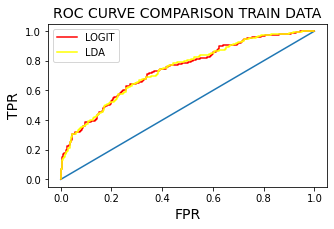

In [78]:
logit_fpr_train, logit_tpr_train, logit_threshold_train = roc_curve(train_labels, best_model.predict_proba(x_train)[:,1])
lda_fpr_train, lda_tpr_train, lda_threshold_train = roc_curve(train_labels, best_model_lda.predict_proba(x_train)[:,1])
plt.figure(figsize = (5,3))
plt.plot([0,1],[0,1])
plt.plot(logit_fpr_train, logit_tpr_train, color = 'red', label = 'LOGIT')
plt.plot(lda_fpr_train, lda_tpr_train, color = 'yellow', label = 'LDA')
plt.title('ROC CURVE COMPARISON TRAIN DATA',fontsize = 14)
plt.xlabel('FPR',fontsize = 14)
plt.ylabel('TPR',fontsize = 14)
plt.legend()
plt.show()

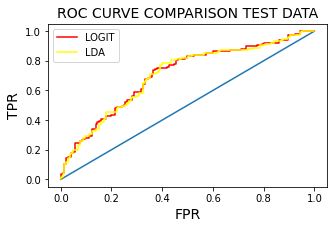

In [79]:
logit_fpr_test, logit_tpr_test, logit_threshold_test = roc_curve(test_labels, best_model.predict_proba(x_test)[:,1])
lda_fpr_test, lda_tpr_test, lda_threshold_test = roc_curve(test_labels, best_model_lda.predict_proba(x_test)[:,1])
plt.figure(figsize = (5,3))
plt.plot([0,1],[0,1])
plt.plot(logit_fpr_test, logit_tpr_test, color = 'red', label = 'LOGIT')
plt.plot(lda_fpr_test, lda_tpr_test, color = 'yellow', label = 'LDA')
plt.title('ROC CURVE COMPARISON TEST DATA',fontsize = 14)
plt.xlabel('FPR',fontsize = 14)
plt.ylabel('TPR',fontsize = 14)
plt.legend()
plt.show()

# Digging some insights for  2.4

In [80]:
data = pd.read_csv('Holiday_Package-1.csv')

In [81]:
data = data.iloc[:,1::]
data.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [82]:
data.groupby('Holliday_Package')[['Salary','age','educ']].median()

,Salary,age,educ
Holliday_Package,,,
no,43940,40,10
yes,39809,39,9


In [83]:
pd.crosstab(data.Holliday_Package, data.foreign)

foreign,no,yes
Holliday_Package,,
no,402,69
yes,254,147


In [84]:
data.foreign.value_counts()

no     656
yes    216
Name: foreign, dtype: int64

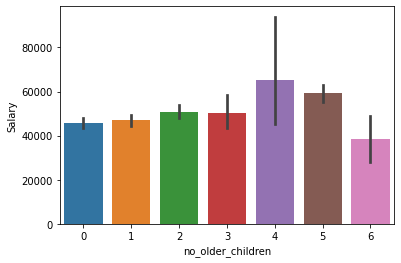

In [85]:
sns.barplot(x = df.no_older_children, y = df.Salary);